In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from kvae import VariationalAutoencoder

%matplotlib inline

In [9]:
batch_size = 128
latent_dim = 2

intermediate_dims = [512, 256, 128, 64] # 137.45

epochs = 50

In [27]:
# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

input_dim = x_train.shape[1]

x_train.shape, x_test.shape, input_dim

((60000, 784), (10000, 784), 784)

In [56]:
vae = VariationalAutoencoder(input_dim, intermediate_dims, latent_dim)

vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_140 (Dense)               (None, 512)          401920      input_24[0][0]                   
__________________________________________________________________________________________________
dense_141 (Dense)               (None, 256)          131328      dense_140[0][0]                  
__________________________________________________________________________________________________
dense_142 (Dense)               (None, 128)          32896       dense_141[0][0]                  
__________________________________________________________________________________________________
dense_143 

/home/yannick/Work/github/Spikes/python/kvae.py:85: UserWarning: Output "custom_variational_layer_12" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_12" during training.
  vae = Model(x, y)


In [ ]:
from random import seed

seed(42)

history = vae.fit(x_train,
                  shuffle=True,
                  #epochs=epochs,
                  epochs=80,
                  batch_size=batch_size,
                  validation_data=(x_test, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 4s - loss: 184.4121 - val_loss: 163.9239
Epoch 2/80
60000/60000 [==============================] - 3s - loss: 158.1638 - val_loss: 154.0154
Epoch 3/80
60000/60000 [==============================] - 3s - loss: 150.8045 - val_loss: 150.0561
Epoch 4/80
60000/60000 [==============================] - 3s - loss: 147.3316 - val_loss: 146.6374
Epoch 5/80
60000/60000 [==============================] - 3s - loss: 144.9373 - val_loss: 142.7232
Epoch 6/80
60000/60000 [==============================] - 3s - loss: 142.9191 - val_loss: 141.3889
Epoch 7/80
60000/60000 [==============================] - 3s - loss: 141.9115 - val_loss: 141.6631
Epoch 8/80
60000/60000 [==============================] - 3s - loss: 141.3296 - val_loss: 141.1049
Epoch 9/80
60000/60000 [==============================] - 3s - loss: 140.6682 - val_loss: 140.8108
Epoch 10/80
60000/60000 [==============================] - 

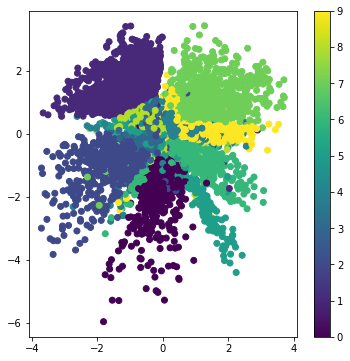

In [39]:
x_test_encoded = vae.encode(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

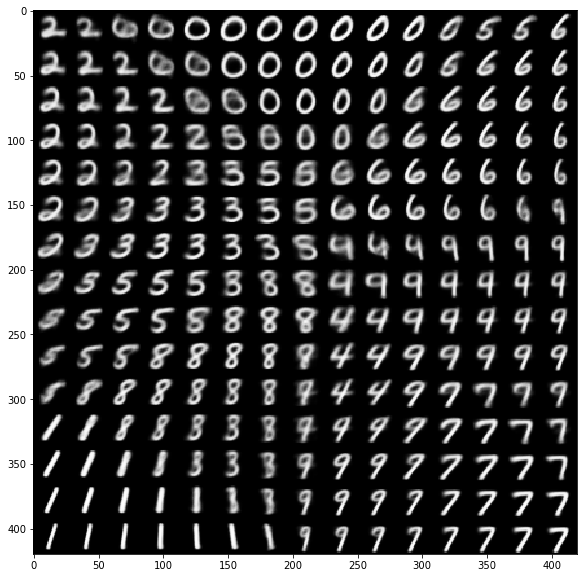

In [40]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.generate(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

In [48]:
vae.input_dim

784

In [55]:
from keras.layers import Input, Dense, Lambda, Layer
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist
x = Input(shape=(100,))
K.int_shape(x)

(None, 100)